<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company.

More precisely, a stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, and if it decreases, the investor incurs a loss.  Determining the stock price is complex as it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day and the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 

For the purpose of this lab, you are a data scientist working for a hedge fund and it is your job to determine any suspicious stock activity. In this lab, you will extract stock data using the Python library <code>yfinance</code>.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>

In [1]:
%%capture
!pip install yfinance==0.2.4

In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module, it is possible to create an object with access to functions to extract data. To do this, the ticker symbol for the stock needs to be provided which, here, is AAPL for the company Apple.


In [3]:
apple = yf.Ticker("AAPL")

Now, the functions and variables needed to extract the data can be accessed. These functions and variables can be found here: https://aroussi.com/post/python-yahoo-finance.


In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2023-05-16 17:09:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json.1’

apple.json.1        100%[===================>]   5.57K  --.-KB/s    in 0s      

2023-05-16 17:09:05 (35.8 MB/s) - ‘apple.json.1’ saved [5699/5699]



### Stock Info


Using the attribute <code>info</code>, information can be extracted about the stock as a Python dictionary.


In [5]:
import json

with open('apple.json') as json_file:
    apple_info = json.load(json_file)
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

The country of the stock can be found using the key <code>'country'</code>.


In [6]:
apple_info['country']

'United States'

### Share Price Extraction


A share is the single smallest part of a company's stock that can be bought. The prices of these shares fluctuate over time. Using the <code>history()</code> method, the share price of the stock can be found over a certain period of time. Using the `period` parameter, it is possible to set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [7]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087894,0.087894,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [9]:
apple_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

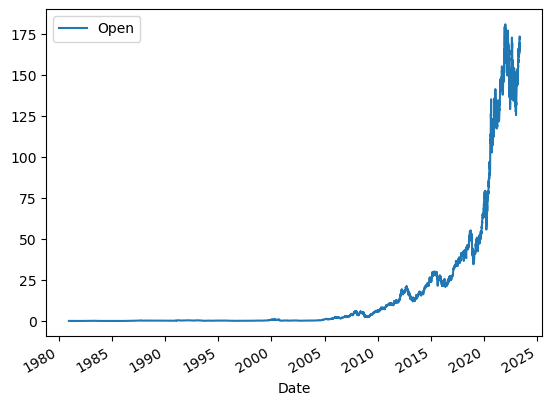

In [10]:
apple_share_price_data.plot(x="Date", y="Open")

### Dividend Extraction


Dividends are the distribution of a company's profits to its shareholders. In this case, dividends are defined as the amount of money returned per share owned by the investor. Using the variable `dividends`, a DataFrame of this information can be obtained. The period of the data is given by the period defined in the `history` function.


In [11]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
Name: Dividends, Length: 79, dtype: float64

<AxesSubplot:xlabel='Date'>

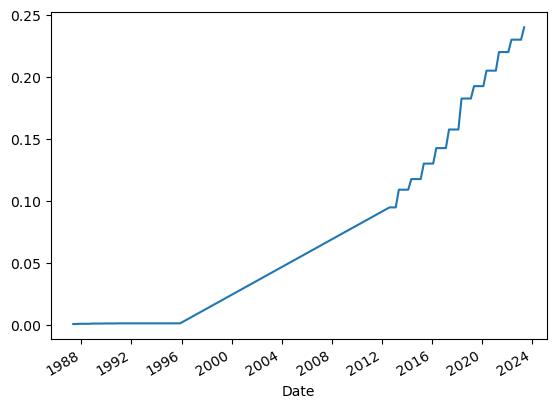

In [12]:
apple.dividends.plot()

### TASK 1


Using the `Ticker` module, create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called and name the object <code>amd</code>.


In [13]:
amd = yf.Ticker("AMD")

In [14]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2023-05-16 17:15:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.1’

amd.json.1          100%[===================>]   5.70K  --.-KB/s    in 0s      

2023-05-16 17:15:30 (30.4 MB/s) - ‘amd.json.1’ saved [5838/5838]



In [15]:
import json

with open('amd.json') as json_file:
    amd_info = json.load(json_file)
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

**Question 1**:

Use the key <code>country</code> to find the country the stock belongs to.


In [16]:
amd_info['country']

'United States'

**Question 2**:

Use the key <code>sector</code> to find the sector the stock belongs to.


In [17]:
amd_info['sector']

'Technology'

**Question 3**:

Obtain stock data for AMD using the `history` function, set the `period` to max, and find the `Volume` traded on the first day (first row).


In [18]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.iloc[0]['Volume']

219600.0

<h2>Authors</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a>

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> IBM Corporation 2020. All rights reserved. <h3/>

<p>
